# Tucson Crossing: Honduras
- Four SSP Scenarios
- Saving output DF and Graphs

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# Imputting libraries
from sklearn.linear_model import LinearRegression

# Saving Model Summaries
import statsmodels.api as sm

# Formatting printing and floats
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

# Parsing into a dataframe
wide_df = pd.read_csv('INPUTS_OUTPUTS_NEW_VARIABLES_ML/INPUT_DATA_SCRIPT_ML/Honduras/HON_USA_FINAL_VARS.csv')

# Dropping columns
cols_out = ['CSV', 'Country', 'New_Data_Type']
wide_df = wide_df.drop(cols_out, axis=1).copy()

# Cleaning/parsing
wide_df.iloc[:, 4:] = wide_df.iloc[:, 4:].replace(0, np.nan)  # Replacing all 0 values with NaN values
wide_df.iloc[:, 4:] = wide_df.iloc[:, 4:].astype(float)       # Data type to float 

In [2]:
wide_df

,Type_of_Variable,Country_Code,Variable,Unit_of_Measure,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,TRAC,HON,HON_Rio_Grande,Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1112.00,7286.00,4559.00,4714.00,5701.00,16726.00,35537.00,63825.00,29945.00,48324.00,24157.00,67834.00,129374.00,23393.00,240267.00,46432.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TRAC,HON,HON_Tucson,Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.00,1618.00,1407.00,1390.00,1326.00,2701.00,2662.00,2409.00,1533.00,3041.00,2029.00,3667.00,6819.00,3163.00,5803.00,1424.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TRAC,HON,HON_San_Diego,Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.00,292.00,249.00,216.00,230.00,297.00,366.00,439.00,291.00,795.00,752.00,4351.00,5326.00,914.00,2555.00,471.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SSP SCENARIO,HON,HON_SSP119_avg_temp,Degrees Celsius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.16,24.50,24.02,24.00,23.38,23.26,23.96,24.60,23.83,23.13,24.09,23.94,24.03,23.99,23.75,24.03,24.48,23.54,24.04,23.92,24.82,24.24,23.84,23.91,24.80,23.84,24.24,24.11,24.30,24.18,23.93,24.13,24.25,23.88,23.76,24.24,24.99,24.63,24.44,24.26,23.89,23.12,24.28,24.23,23.63,23.88,24.30,24.14,24.12,23.50,23.82,23.78,24.19,24.09,23.95,24.44,24.24,23.58,24.32,24.43,23.35,23.90,24.26,23.57,24.04,24.23,24.05,23.97,24.37,23.87,23.47,23.92,23.73,23.11,23.62,24.10,23.85,23.95,23.56,24.49,23.95,24.01,23.84,23.93,24.00,24.13
4,SSP SCENARIO,HON,HON_SSP245_avg_temp,Degrees Celsius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.05,24.30,24.21,24.97,24.46,23.89,23.58,24.16,24.97,24.93,24.47,24.19,24.12,24.17,24.14,24.63,24.09,23.61,23.37,23.83,23.94,24.17,24.23,24.33,24.46,24.50,23.95,23.70,24.35,24.35,24.14,24.44,24.52

In [3]:
# Function to parse data into numeric

def prepare_data(df, year_columns):
    df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')
    return df

# # Function to impute data with OLS

def impute_with_ols(df, train_start_year, train_end_year):
    # Defining columns
    year_columns = [str(year) for year in range(train_start_year, train_end_year + 1)]
    # Imputting data
    for index, row in df.iterrows():
        # Fitting the model only on available data
        available_data = row[year_columns].dropna()
        if len(available_data) < 2:
            continue  # Need at least two data points to fit a line
        
        # Determining imputation method for each variable
        impute_method = {}
        for col in available_data.index:
            if col in ['GDP (current US$)', 'GDP per capita (current US$)', 'Unemployment, total (% of total labor force) (modeled ILO estimate)']:
                impute_method[col] = 'mean'
            else:
                impute_method[col] = 'median'

        # Setting variables for OLS
        X_train = np.array(list(map(int, available_data.index))).reshape(-1, 1)
        y_train = available_data.values
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Predicting missing values
        missing_years = row[year_columns][row[year_columns].isna()].index
        if missing_years.empty:
            continue
        X_missing = np.array(list(map(int, missing_years))).reshape(-1, 1)
        predicted_values = model.predict(X_missing)
        
        # Filling missing values in the DataFrame using the appropriate imputation method
        for col in missing_years:
            if col in impute_method:
                if impute_method[col] == 'mean':
                    df.loc[index, col] = row[year_columns].mean()
                elif impute_method[col] == 'median':
                    df.loc[index, col] = row[year_columns].median()

    return df


# Converting year columns to numeric: 1960 - 2100

year_columns = [str(year) for year in range(1960, 2100)]
wide_df = prepare_data(wide_df, year_columns)

In [4]:
wide_df.tail()

,Type_of_Variable,Country_Code,Variable,Unit_of_Measure,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
24,POPULATION VARIABLE,USA,Prevalence of undernourishment (% of population),Share of Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3528128.93,3230717.55,2926099.15,2614705.59,2626639.62,2320580.58,2324220.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,POPULATION VARIABLE,USA,Corruption,Counts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15700.00,16200.00,15900.00,15900.00,15967.00,14765.00,13497.00,9393.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,POPULATION VARIABLE,USA,Government Effectiveness: Estimate,Rate (0 to 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.52,NaN,1.70,NaN,1.72,NaN,1.62,1.54,1.74,1.53,1.58,1.64,1.61,1.50,1.55,1.51,1.52,1.52,1.46,1.43,1.44,1.52,1.54,1.45,1.28,1.30,1.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,ECONOMIC VARIABLE,USA,GDP (current US$),USD,543000000000.00,563000000000.00,605000000000.00,639000000000.00,686000000000.00,744000000000.00,815000000000.00,862000000000.00,943000000000.00,1020000000000.00,1070000000000.00,1160000000000.00,1280000000000.00,1430000000000.00,1550000000000.00,1680000000000.00,1870000000000.00,2080000000000.00,2350000000000.00,2630000000000.00,2860000000000.00,3210000000000.00,3340000000000.00,3630000000000.00,4040000000000.00,4340000000000.00,4580000000000.00,4860000000000.00,5240000000000.00,5640000000000.00,5960000000000.00,6160000000000.00,6520000000000.00,6860000000000.00,7290000000000.00,7640000000000.00,8070000000000.00,8580000000000.00,9060000000000.00,9630000000000.00,10300000000000.00,10600000000000.00,10900000000000.00,11500000000000.00,12200000000000.00,13000000000000.00,13800000000000.00,14500000000000.00,14800000000000.00,14500000000000.00,15000000000000.00,15600000000000.00,16300000000000.00,16800000000000.00,17600000000000.00,18200000000000.00,18700000000000.00,19500000000000.00,20500000000000.00,21400000000000.00,21100000000000.00,23300000000000.00,25400000000000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [5]:
# OLS : 2015 TO 2022

# Perform imputation with OLS for specified years
wide_df_processed_data_ols = impute_with_ols(wide_df, 2015, 2022)
wide_df_processed_data_ols = wide_df_processed_data_ols

# Dropping columns
years_to_drop = [str(year) for year in range(1960, 2015)]
wide_df_processed_data_ols = wide_df_processed_data_ols.drop(columns=years_to_drop)
# wide_df_processed_data_ols.head()

In [6]:
# Function to parse data into numeric

def convert_to_numeric(df):
    for col in df.columns:
        try:
            # Force convert to float and handle exceptions
            df[col] = pd.to_numeric(df[col], errors='raise')
        except ValueError as e:
            # Log columns that could not be converted, with error message
            print(f"Column {col} cannot be converted to numeric: {e}")
        except Exception as e:
            # Log unexpected exceptions
            print(f"Unexpected error with column {col}: {e}")
    return df

# Function for Linear Interpolation

def linear_interpolation2(df, start_year, end_year):
    # Create a list of year columns
    year_columns = [str(year) for year in range(start_year, end_year + 1)]
    # Filter out columns that are not in the year range
    year_columns = [col for col in year_columns if col in df.columns]

    # Convert all potential year columns to numeric
    df[year_columns] = convert_to_numeric(df[year_columns])

    # Apply linear interpolation to only the year columns
    df[year_columns] = df[year_columns].interpolate(method='linear', axis=1, limit_direction='both')

    return df

# Calling function with specified years

wide_df_processed_data_ols = linear_interpolation2(wide_df_processed_data_ols, 1960, 2022)
# wide_df_processed_data_ols

/var/folders/n9/h_xmdzn54836zt3_ch46ywdm0000gn/T/ipykernel_12014/4089097305.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='raise')


In [7]:
# wide_df_processed_data_ols['Type__of_Variable'][7:]

In [8]:
# Melting the dataframe

long_df = pd.melt(wide_df_processed_data_ols, id_vars=['Country_Code', 'Variable', 
                                                       'Unit_of_Measure', 'Type_of_Variable'],
                                                         var_name='Year', value_name='Value')

# Printing melted dataframe 
long_df['Year'] = long_df['Year'].astype(int) 
long_df_22to100 = long_df[long_df['Year'] >= 2021]

In [9]:
long_df.head(100)

,Country_Code,Variable,Unit_of_Measure,Type_of_Variable,Year,Value
0,HON,HON_Rio_Grande,Person,TRAC,2015,29945.00
1,HON,HON_Tucson,Person,TRAC,2015,1533.00
2,HON,HON_San_Diego,Person,TRAC,2015,291.00
3,HON,HON_SSP119_avg_temp,Degrees Celsius,SSP SCENARIO,2015,23.16
4,HON,HON_SSP245_avg_temp,Degrees Celsius,SSP SCENARIO,2015,23.05
5,HON,HON_SSP370_avg_temp,Degrees Celsius,SSP SCENARIO,2015,23.10
6,HON,HON_SSP585_avg_temp,Degrees Celsius,SSP SCENARIO,2015,22.93
7,HON,"Population, total",Person,POPULATION VARIABLE,2015,9294505.00
8,HON,Rural population (% of total population),Share of Population,POPULATION VARIABLE,2015,4167191.32
9,HON,Population ages 15-64 (% of total population),Share of Population,POPULATION VARIABLE,2015,5788894.19


In [10]:
# Libraries

import statsmodels.api as sm
# from sklearn.datasets import load_iris 
from math import log
import statsmodels.api as sm
# from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Filter data for temperature projections and historical data

# Historical Data from 1960 to 2022
historical_data = long_df[long_df['Year'] <= 2022]
# Predicted Data from 2022 to 2100
predicted_data = long_df[long_df['Year'] >= 2023]

In [11]:
##################################################################

# Scenario 1: HON_SSP119_avg_temp
# features_1960_2022_ssp119

# Creating a dataframe 'features_1960_2022_ssp119' 
# Years 1960 to 2022
# 'features_ssp119' stores all values from all variables except SSP and TRAC data
# 'features_ssp119' = X

# Filtering data for 'HON_SSP119_avg_temp'
HON_features_1960_2022_ssp119 = historical_data[historical_data['Variable'] == 'HON_SSP119_avg_temp'] 
HON_features_1960_2022_ssp119 = HON_features_1960_2022_ssp119[['Year', 'Value']]                            
HON_features_1960_2022_ssp119 = HON_features_1960_2022_ssp119.rename(columns={'Value': 'Temperature'})      

##################################################################

# Scenario 2: HON_SSP245_avg_temp
# features_1960_2022_ssp245

# Creating a dataframe 'features_1960_2022_ssp245' 
# Years 1960 to 2022
# 'features_ssp119' stores all values from all variables except SSP and TRAC data
# 'features_ssp119' = X

# Filtering data for 'HON_SSP245_avg_temp'
HON_features_1960_2022_ssp245 = historical_data[historical_data['Variable'] == 'HON_SSP245_avg_temp'] 
HON_features_1960_2022_ssp245 = HON_features_1960_2022_ssp245[['Year', 'Value']]                            
HON_features_1960_2022_ssp245 = HON_features_1960_2022_ssp245.rename(columns={'Value': 'Temperature'})      

##################################################################

# Scenario 3: HON_SSP370_avg_temp
# features_1960_2022_ssp370

# Creating a dataframe 'features_1960_2022_ssp370' 
# Years 1960 to 2022
# 'features_ssp119' stores all values from all variables except SSP and TRAC data
# 'features_ssp119' = X

# Filtering data for 'HON_SSP245_avg_temp'
HON_features_1960_2022_ssp370 = historical_data[historical_data['Variable'] == 'HON_SSP370_avg_temp'] 
HON_features_1960_2022_ssp370 = HON_features_1960_2022_ssp370[['Year', 'Value']]                            
HON_features_1960_2022_ssp370 = HON_features_1960_2022_ssp370.rename(columns={'Value': 'Temperature'})      

##################################################################

# Scenario 4: HON_SSP585_avg_temp
# features_1960_2022_ssp585

# Creating a dataframe 'features_1960_2022_ssp585' 
# Years 1960 to 2022
# 'features_ssp119' stores all values from all variables except SSP and TRAC data
# 'features_ssp119' = X

# Filtering data for 'HON_SSP585_avg_temp'
HON_features_1960_2022_ssp585 = historical_data[historical_data['Variable'] == 'HON_SSP585_avg_temp'] 
HON_features_1960_2022_ssp585 = HON_features_1960_2022_ssp585[['Year', 'Value']]                            
HON_features_1960_2022_ssp585 = HON_features_1960_2022_ssp585.rename(columns={'Value': 'Temperature'})      

##################################################################

# Additional Variables to all models
# additional_variables: not considering SSP and TRAC data: X
additional_variables = [
    'Population, total',
    'Rural population (% of total population)',
    'Population ages 15-64 (% of total population)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Victims of intentional homicide',
    'Prevalence of severe food insecurity in the population (%)',
    'Prevalence of undernourishment (% of population)',
    'Corruption',
    'Government Effectiveness: Estimate',
    'GDP (current US$)',
    'GDP per capita (current US$)'
]
    
##################################################################

##################################################################

# Scenario 1: _SSP119_avg_temp
# features_1960_2022_ssp119
# Getting all values from additional_variables into features
for var in additional_variables:
    var_data = historical_data[historical_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    HON_features_1960_2022_ssp119 = pd.merge(HON_features_1960_2022_ssp119, var_data, on='Year', how='outer') 
    
# features_1960_2022_ssp119.tail() 
##################################################################

# Scenario 2: _SSP245_avg_temp
# features_1960_2022_ssp245
# Getting all values from additional_variables into features
for var in additional_variables:
    var_data = historical_data[historical_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    HON_features_1960_2022_ssp245 = pd.merge(HON_features_1960_2022_ssp245, var_data, on='Year', how='outer') #CHANGE!!!!!!!!!!!
    
# features_1960_2022_ssp245.tail() 
##################################################################

# Scenario 3: _SSP370_avg_temp
# features_1960_2022_ssp370
# Getting all values from additional_variables into features
for var in additional_variables:
    var_data = historical_data[historical_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    HON_features_1960_2022_ssp370 = pd.merge(HON_features_1960_2022_ssp370, var_data, on='Year', how='outer') #CHANGE!!!!!!!!!!!
    
# features_1960_2022_ssp370.tail() 
##################################################################

# Scenario 4: _SSP585_avg_temp
# features_1960_2022_ssp585
# Getting all values from additional_variables into features
for var in additional_variables:
    var_data = historical_data[historical_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    HON_features_1960_2022_ssp585 = pd.merge(HON_features_1960_2022_ssp585, var_data, on='Year', how='outer') #CHANGE!!!!!!!!!!!

# features_1960_2022_ssp585.head() 

In [12]:
# HON_features_1960_2022_ssp119

In [13]:
# Libraries 

from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor

In [14]:
# Historic data on temperature
X1_119_HON = HON_features_1960_2022_ssp119[['Temperature']]         
# Predictions on training data based on temperature
Y1_119_HON = HON_features_1960_2022_ssp119.drop(columns='Temperature')      
# Training model with Ridge Regression for 'HON_SSP119_avg_temp' based on 'Temperature'
model119_HON = MultiOutputRegressor(Ridge(random_state=123)).fit(X1_119_HON, Y1_119_HON)

In [15]:
# Y1_119_HON.shape    # Y1_119_HON.shape # (32768, 14)
# X1_119_HON.shape # Y1_119_HON.shape # (32768, 1)
Y1_119_HON.tail()

,Year,"Population, total",Rural population (% of total population),Population ages 15-64 (% of total population),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Victims of intentional homicide,Prevalence of severe food insecurity in the population (%),Prevalence of undernourishment (% of population),Corruption,Government Effectiveness: Estimate,GDP (current US$),GDP per capita (current US$)
16379,2022,333287557.00,56378923.14,56378923.14,2056703.12,21593.00,2324220.88,2324220.88,9393.00,-0.87,25400000000000.00,76329.58
16380,2022,333287557.00,56378923.14,56378923.14,2056703.12,21593.00,2324220.88,2324220.88,9393.00,1.26,31717699764.00,3040.17
16381,2022,333287557.00,56378923.14,56378923.14,2056703.12,21593.00,2324220.88,2324220.88,9393.00,1.26,31717699764.00,76329.58
16382,2022,333287557.00,56378923.14,56378923.14,2056703.12,21593.00,2324220.88,2324220.88,9393.00,1.26,25400000000000.00,3040.17
16383,2022,333287557.00,56378923.14,56378923.14,2056703.12,21593.00,2324220.88,2324220.88,9393.00,1.26,25400000000000.00,76329.58


In [16]:
model119_HON

MultiOutputRegressor(estimator=Ridge(random_state=123))

In [17]:
##################################################################
# Training Data: training all features based on temperature

######### Crossing 1: HON_Tucson #########
# X1 and Y1 are based on features_ssp119 which was filtered with 'HON_SSP119_avg_temp'

# Historic data on temperature
X1_119_HON = HON_features_1960_2022_ssp119[['Temperature']]         
# Predictions on training data based on temperature
Y1_119_HON = HON_features_1960_2022_ssp119.drop(columns='Temperature')      
# Training model with Ridge Regression for 'HON_SSP119_avg_temp' based on 'Temperature'
model119_HON = MultiOutputRegressor(Ridge(random_state=123)).fit(X1_119_HON, Y1_119_HON)

##################################################################
##################################################################
# Training Data: training all features based on temperature

######### Crossing 1: HON_Tucson #########
# X1 and Y1 are based on features_ssp245 which was filtered with 'HON_SSP245_avg_temp'

# Historic data on temperature
X2_245_HON = HON_features_1960_2022_ssp245[['Temperature']]         
# Predictions on training data based on temperature
Y2_245_HON = HON_features_1960_2022_ssp245.drop(columns='Temperature')      
# Training model with Ridge Regression for 'HON_SSP119_avg_temp' based on 'Temperature'
model245_HON = MultiOutputRegressor(Ridge(random_state=123)).fit(X2_245_HON, Y2_245_HON)

##################################################################
##################################################################
# Training Data: training all features based on temperature

######### Crossing 1: HON_Tucson #########
# X1 and Y1 are based on features_ssp370 which was filtered with 'HON_SSP370_avg_temp'

# Historic data on temperature
X3_370_HON = HON_features_1960_2022_ssp370[['Temperature']]         
# Predictions on training data based on temperature
Y3_370_HON = HON_features_1960_2022_ssp370.drop(columns='Temperature')      
# Training model with Ridge Regression for 'HON_SSP119_avg_temp' based on 'Temperature'
model370_HON = MultiOutputRegressor(Ridge(random_state=123)).fit(X3_370_HON, Y3_370_HON)

##################################################################
##################################################################
# Training Data: training all features based on temperature

######### Crossing 1: HON_Tucson #########
# X1 and Y1 are based on features_ssp585 which was filtered with 'HON_SSP585_avg_temp'

# Historic data on temperature
X4_585_HON = HON_features_1960_2022_ssp585[['Temperature']]         
# Predictions on training data based on temperature
Y4_585_HON = HON_features_1960_2022_ssp585.drop(columns='Temperature')      
# Training model with Ridge Regression for 'HON_SSP119_avg_temp' based on 'Temperature'
model585_HON = MultiOutputRegressor(Ridge(random_state=123)).fit(X4_585_HON, Y4_585_HON)

##################################################################

In [18]:
# Prediction Dataframe: 2023 to 2100 (predicted_data)
##################################################################

# Additional Variables to all models
# additional_variables: not considering SSP and TRAC data: X
#####

additional_variables = [
    'Population, total',
    'Rural population (% of total population)',
    'Population ages 15-64 (% of total population)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Victims of intentional homicide',
    'Prevalence of severe food insecurity in the population (%)',
    'Prevalence of undernourishment (% of population)',
    'Corruption',
    'Government Effectiveness: Estimate',
    'GDP (current US$)',
    'GDP per capita (current US$)'
]

#####


# Scenario 1: _SSP119_avg_temp = Y
##################################################################
# Creating a dataframe 'new_features_2023_2100_ssp119' 
# Years 2023 to 2100
# 'features_ssp119' stores all values from all variables except SSP and TRAC data
# 'new_features_2023_2100_ssp119' = X
#####
# Filtering data for 'HON_SSP119_avg_temp'
HON_new_features_2023_2100_ssp119 = predicted_data[predicted_data['Variable'] == 'HON_SSP119_avg_temp']
HON_new_features_2023_2100_ssp119 = HON_new_features_2023_2100_ssp119[['Year', 'Value']]  
HON_new_features_2023_2100_ssp119 = HON_new_features_2023_2100_ssp119.rename(columns={'Value': 'Temperature'})  
#####
# Loop through each additional variable and merge with X1 DataFrame
# _SSP119_avg_temp
for var in additional_variables:
    var_data = predicted_data[predicted_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    HON_new_features_2023_2100_ssp119 = pd.merge(HON_new_features_2023_2100_ssp119, var_data, on='Year', how='outer')
##################################################################


# Scenario 2: _SSP245_avg_temp = Y
##################################################################
# Creating a dataframe 'new_features_2023_2100_ssp245' 
# Years 2023 to 2100
# 'features_ssp119' stores all values from all variables except SSP and TRAC data
# 'new_features_2023_2100_ssp245' = X
#####
# Filtering data for 'HON_SSP245_avg_temp'
HON_new_features_2023_2100_ssp245 = predicted_data[predicted_data['Variable'] == 'HON_SSP245_avg_temp']
HON_new_features_2023_2100_ssp245 = HON_new_features_2023_2100_ssp245[['Year', 'Value']]  
HON_new_features_2023_2100_ssp245 = HON_new_features_2023_2100_ssp245.rename(columns={'Value': 'Temperature'})  
#####
# Loop through each additional variable and merge with X1 DataFrame
# _SSP245_avg_temp
for var in additional_variables:
    var_data = predicted_data[predicted_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    HON_new_features_2023_2100_ssp245 = pd.merge(HON_new_features_2023_2100_ssp245, var_data, on='Year', how='outer')
##################################################################


# Scenario 3: _SSP370_avg_temp = Y
##################################################################
# Creating a dataframe 'new_features_2023_2100_ssp370' 
# Years 2023 to 2100
# 'features_ssp119' stores all values from all variables except SSP and TRAC data
# 'new_features_2023_2100_ssp370' = X

# Filtering data for 'HON_SSP370_avg_temp'
HON_new_features_2023_2100_ssp370 = predicted_data[predicted_data['Variable'] == 'HON_SSP370_avg_temp']
HON_new_features_2023_2100_ssp370 = HON_new_features_2023_2100_ssp370[['Year', 'Value']]  
HON_new_features_2023_2100_ssp370 = HON_new_features_2023_2100_ssp370.rename(columns={'Value': 'Temperature'})  
#####
# Loop through each additional variable and merge with X1 DataFrame
# _SSP370_avg_temp
for var in additional_variables:
    var_data = predicted_data[predicted_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    HON_new_features_2023_2100_ssp370 = pd.merge(HON_new_features_2023_2100_ssp370, var_data, on='Year', how='outer')
##################################################################


# Scenario 4: _SSP585_avg_temp = Y
##################################################################
# Creating a dataframe 'new_features_2023_2100_ssp585' 
# Years 2023 to 2100
# 'features_ssp119' stores all values from all variables except SSP and TRAC data
# 'new_features_2023_2100_ssp585' = X

# Filtering data for 'HON_SSP585_avg_temp'
HON_new_features_2023_2100_ssp585 = predicted_data[predicted_data['Variable'] == 'HON_SSP585_avg_temp']
HON_new_features_2023_2100_ssp585 = HON_new_features_2023_2100_ssp585[['Year', 'Value']]  
HON_new_features_2023_2100_ssp585 = HON_new_features_2023_2100_ssp585.rename(columns={'Value': 'Temperature'})  
#####
# Loop through each additional variable and merge with X1 DataFrame
# _SSP585_avg_temp
for var in additional_variables:
    var_data = predicted_data[predicted_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    HON_new_features_2023_2100_ssp585 = pd.merge(HON_new_features_2023_2100_ssp585, var_data, on='Year', how='outer')

In [19]:
# Predicting all NaN values of the additional_variables

##################################################################
# X2 is getting just the temperature values
# new_features_2023_2100_ssp119
X2_119_HON = HON_new_features_2023_2100_ssp119[['Temperature']]
# Here the model is predicting all values and storing them in Y2
Y2_119_HON = model119_HON.predict(X2_119_HON)[:,1:]
# The additional_variables are now getting the predicted Y2 values
HON_new_features_2023_2100_ssp119[additional_variables] = Y2_119_HON
##################################################################
# X2 is getting just the temperature values
# new_features_2023_2100_ssp245
X2_245_HON = HON_new_features_2023_2100_ssp245[['Temperature']]
# Here the model is predicting all values and storing them in Y2
Y2_245_HON = model245_HON.predict(X2_245_HON)[:,1:]
# The additional_variables are now getting the predicted Y2 values
HON_new_features_2023_2100_ssp245[additional_variables] = Y2_245_HON
##################################################################
# X2 is getting just the temperature values
# new_features_2023_2100_ssp370
X2_370_HON = HON_new_features_2023_2100_ssp370[['Temperature']]
# Here the model is predicting all values and storing them in Y2
Y2_370_HON = model370_HON.predict(X2_370_HON)[:,1:]
# The additional_variables are now getting the predicted Y2 values
HON_new_features_2023_2100_ssp370[additional_variables] = Y2_370_HON
##################################################################
# X2 is getting just the temperature values
# new_features_2023_2100_ssp585
X2_585_HON = HON_new_features_2023_2100_ssp585[['Temperature']]
# Here the model is predicting all values and storing them in Y2
Y2_585_HON = model585_HON.predict(X2_585_HON)[:,1:]
# The additional_variables are now getting the predicted Y2 values
HON_new_features_2023_2100_ssp585[additional_variables] = Y2_585_HON

# Predicting TRAC from all features

In [20]:
# Filter data for temperature projections and historical data

# Prediction starts from 2015 because TRAC starts on 2015
# long_df goes from 2015 to 2100

# Temperature Data from 2023 to 2100, all four SSPs

# Historical Data from 2015 to 2022
long_hist_data = long_df[long_df['Year'] <= 2022]
# Predicted Data from 2023 to 2100
long_predicted_data = long_df[long_df['Year'] >= 2023]
# Dependent Variables, TRAC Crossings
dep_vars = long_hist_data[long_hist_data['Variable'].isin(['HON_Rio_Grande', 'HON_Tucson', 'HON_Tucson'])]

In [21]:
##################################################################
# Filter data for 'HON_SSP119_avg_temp'

X1_119_HON = long_hist_data[long_hist_data['Variable'] == 'HON_SSP119_avg_temp']
X1_119_HON = X1_119_HON[['Year', 'Value']]
X1_119_HON = X1_119_HON.rename(columns={'Value': 'Temperature'})
##################################################################
# Filter data for 'HON_SSP245_avg_temp'

X1_245_HON = long_hist_data[long_hist_data['Variable'] == 'HON_SSP245_avg_temp']
X1_245_HON = X1_245_HON[['Year', 'Value']]
X1_245_HON = X1_245_HON.rename(columns={'Value': 'Temperature'})
##################################################################
# Filter data for 'HON_SSP370_avg_temp'

X1_370_HON = long_hist_data[long_hist_data['Variable'] == 'HON_SSP370_avg_temp']
X1_370_HON = X1_370_HON[['Year', 'Value']]
X1_370_HON = X1_370_HON.rename(columns={'Value': 'Temperature'})
##################################################################
# Filter data for 'HON_SSP585_avg_temp'

X1_585_HON = long_hist_data[long_hist_data['Variable'] == 'HON_SSP585_avg_temp']
X1_585_HON = X1_585_HON[['Year', 'Value']]
X1_585_HON = X1_585_HON.rename(columns={'Value': 'Temperature'})
##################################################################

# List of additional variables to add to X1

additional_variables = [
    'Population, total',
    'Rural population (% of total population)',
    'Population ages 15-64 (% of total population)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Victims of intentional homicide',
    'Prevalence of severe food insecurity in the population (%)',
    'Prevalence of undernourishment (% of population)',
    'Corruption',
    'Government Effectiveness: Estimate',
    'GDP (current US$)',
    'GDP per capita (current US$)',
    'HON_Tucson'
]


##################################################################
# Loop through each additional variable and merge with X1 DataFrame
for var in additional_variables:
    var_data = long_hist_data[long_hist_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    X1_119_HON = pd.merge(X1_119_HON, var_data, on='Year', how='outer')
# Now X1 contains 'Temperature' along with the additional variables for each year
# 2015 to 2022
##################################################################
# Loop through each additional variable and merge with X1 DataFrame
for var in additional_variables:
    var_data = long_hist_data[long_hist_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    X1_245_HON = pd.merge(X1_245_HON, var_data, on='Year', how='outer')
# Now X1 contains 'Temperature' along with the additional variables for each year
# 2015 to 2022
##################################################################
# Loop through each additional variable and merge with X1 DataFrame
for var in additional_variables:
    var_data = long_hist_data[long_hist_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    X1_370_HON = pd.merge(X1_370_HON, var_data, on='Year', how='outer')
# Now X1 contains 'Temperature' along with the additional variables for each year
# 2015 to 2022
##################################################################
# Loop through each additional variable and merge with X1 DataFrame
for var in additional_variables:
    var_data = long_hist_data[long_hist_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    X1_585_HON = pd.merge(X1_585_HON, var_data, on='Year', how='outer')
# Now X1 contains 'Temperature' along with the additional variables for each year

In [22]:
##################################################################
# _SSP119_avg_temp
X1_119_new_HON = X1_119_HON[X1_119_HON['Year'] >= 2015]
##################################################################
# _SSP245_avg_temp
X1_245_new_HON = X1_245_HON[X1_245_HON['Year'] >= 2015]
##################################################################
# _SSP370_avg_temp
X1_370_new_HON = X1_370_HON[X1_370_HON['Year'] >= 2015]
##################################################################
# _SSP585_avg_temp
X1_585_new_HON = X1_585_HON[X1_585_HON['Year'] >= 2015]

In [23]:
# X1_119_new_HON.head()

# Predicting Tucson Crossings

In [24]:
##################################################################
# Predicting Y: _SSP119_avg_temp
Y1_119_HON = X1_119_new_HON[['HON_Tucson']]
X1_predict_119_HON = X1_119_new_HON.drop(columns='HON_Tucson')
##################################################################
# Predicting Y: _SSP245_avg_temp
Y1_245_HON = X1_245_new_HON[['HON_Tucson']]
X1_predict_245_HON = X1_245_new_HON.drop(columns='HON_Tucson')
##################################################################
# Predicting Y: _SSP370_avg_temp
Y1_370_HON = X1_370_new_HON[['HON_Tucson']]
X1_predict_370_HON = X1_370_new_HON.drop(columns='HON_Tucson')
##################################################################
# Predicting Y: _SSP585_avg_temp
Y1_585_HON = X1_585_new_HON[['HON_Tucson']]
X1_predict_585_HON = X1_585_new_HON.drop(columns='HON_Tucson')

In [25]:
print(X1_predict_119_HON.isnull().sum())
print(X1_predict_119_HON.isin([np.nan, np.inf, -np.inf]).sum())


Year                                                                   0
Temperature                                                            0
Population, total                                                      0
Rural population (% of total population)                               0
Population ages 15-64 (% of total population)                          0
Unemployment, total (% of total labor force) (modeled ILO estimate)    0
Victims of intentional homicide                                        0
Prevalence of severe food insecurity in the population (%)             0
Prevalence of undernourishment (% of population)                       0
Corruption                                                             0
Government Effectiveness: Estimate                                     0
GDP (current US$)                                                      0
GDP per capita (current US$)                                           0
dtype: int64
Year                                  

# Training on TRAC: HON_Tucson

In [26]:
# # Training on TRAC: Crossing 1: HON_Tucson

# # _SSP119_avg_temp
# model1_ssp119_HON = sm.OLS(Y1_119_HON, X1_predict_119_HON).fit()
# # _SSP245_avg_temp
# model2_ssp245_HON = sm.OLS(Y1_245_HON, X1_predict_245_HON).fit()
# # _SSP370_avg_temp
# model3_ssp370_HON = sm.OLS(Y1_370_HON, X1_predict_370_HON).fit()
# # _SSP585_avg_temp
# model4_ssp585_HON = sm.OLS(Y1_585_HON, X1_predict_585_HON).fit()

# # Saving Model Summaries

# models_and_data = [
#     (model1_ssp119_HON, "Y1_119_HON", "X1_predict_119_HON"),
#     (model2_ssp245_HON, "Y1_245_HON", "X1_predict_245_HON"),
#     (model3_ssp370_HON, "Y1_370_HON", "X1_predict_370_HON"),
#     (model4_ssp585_HON, "Y1_585_HON", "X1_predict_585_HON")
# ]

# directory_path = "All_outputs/Honduras"

# # Iterate over models and save their summaries
# for model, Y_var, X_var in models_and_data:
#     fitted_model = sm.OLS(eval(Y_var), eval(X_var)).fit()
#     model_name = [name for name, obj in globals().items() if obj is model][0]
#     model_name = f"Tucson_{model_name}"
#     file_path = f"{directory_path}{model_name}_summary.txt"
#     # Save the model summary as a text file
#     with open(file_path, "w") as file:
#         file.write(str(fitted_model.summary()))
# # Training on TRAC: Crossing 1: HON_Rio_Grande

# # _SSP119_avg_temp
# model1_ssp119_HON = sm.OLS(Y1_119_HON, X1_predict_119_HON).fit()
# # _SSP245_avg_temp
# model2_ssp245_HON = sm.OLS(Y1_245_HON, X1_predict_245_HON).fit()
# # _SSP370_avg_temp
# model3_ssp370_HON = sm.OLS(Y1_370_HON, X1_predict_370_HON).fit()
# # _SSP585_avg_temp
# model4_ssp585_HON = sm.OLS(Y1_585_HON, X1_predict_585_HON).fit()

# # Saving Model Summaries

# models_and_data = [
#     (model1_ssp119_HON, "Y1_119_HON", "X1_predict_119_HON"),
#     (model2_ssp245_HON, "Y1_245_HON", "X1_predict_245_HON"),
#     (model3_ssp370_HON, "Y1_370_HON", "X1_predict_370_HON"),
#     (model4_ssp585_HON, "Y1_585_HON", "X1_predict_585_HON")
# ]

# directory_path = "All_outputs/Honduras"

# # Iterate over models and save their summaries
# for model, Y_var, X_var in models_and_data:
#     fitted_model = sm.OLS(eval(Y_var), eval(X_var)).fit()
#     model_name = [name for name, obj in globals().items() if obj is model][0]
#     model_name = f"Rio_Grande_{model_name}"
#     file_path = f"{directory_path}{model_name}_summary.txt"
#     # Save the model summary as a text file
#     with open(file_path, "w") as file:
#         file.write(str(fitted_model.summary()))
# # Training on TRAC: Crossing 1: HON_San_Diego

# _SSP119_avg_temp
model1_ssp119_HON = sm.OLS(Y1_119_HON, X1_predict_119_HON).fit()
# _SSP245_avg_temp
model2_ssp245_HON = sm.OLS(Y1_245_HON, X1_predict_245_HON).fit()
# _SSP370_avg_temp
model3_ssp370_HON = sm.OLS(Y1_370_HON, X1_predict_370_HON).fit()
# _SSP585_avg_temp
model4_ssp585_HON = sm.OLS(Y1_585_HON, X1_predict_585_HON).fit()

# Saving Model Summaries

models_and_data = [
    (model1_ssp119_HON, "Y1_119_HON", "X1_predict_119_HON"),
    (model2_ssp245_HON, "Y1_245_HON", "X1_predict_245_HON"),
    (model3_ssp370_HON, "Y1_370_HON", "X1_predict_370_HON"),
    (model4_ssp585_HON, "Y1_585_HON", "X1_predict_585_HON")
]

directory_path = "All_outputs/Honduras/"

# Iterate over models and save their summaries
for model, Y_var, X_var in models_and_data:
    fitted_model = sm.OLS(eval(Y_var), eval(X_var)).fit()
    model_name = [name for name, obj in globals().items() if obj is model][0]
    model_name = f"Honduras_Tucson_{model_name}"
    file_path = f"{directory_path}{model_name}_summary.txt"
    # Save the model summary as a text file
    with open(file_path, "w") as file:
        file.write(str(fitted_model.summary()))

In [27]:
# TRAC prediction 2023 to 2100: _SSP119_avg_temp
predicted_future_imigrants_ssp119_HON = model1_ssp119_HON.predict(HON_new_features_2023_2100_ssp119)
# TRAC prediction 2023 to 2100: _SSP245_avg_temp
predicted_future_imigrants_ssp245_HON = model2_ssp245_HON.predict(HON_new_features_2023_2100_ssp245)
# TRAC prediction 2023 to 2100: _SSP370_avg_temp
predicted_future_imigrants_ssp370_HON = model3_ssp370_HON.predict(HON_new_features_2023_2100_ssp370)
# TRAC prediction 2023 to 2100: _SSP585_avg_temp
predicted_future_imigrants_ssp585_HON = model4_ssp585_HON.predict(HON_new_features_2023_2100_ssp585)

In [28]:
# Printing Dataframe for SSP119
HON_new_features_2023_2100_ssp119['HON_Tucson'] = predicted_future_imigrants_ssp119_HON
# Printing Dataframe for SSP245
HON_new_features_2023_2100_ssp245['HON_Tucson'] = predicted_future_imigrants_ssp245_HON
# Printing Dataframe for SSP370
HON_new_features_2023_2100_ssp370['HON_Tucson'] = predicted_future_imigrants_ssp370_HON
# Printing Dataframe for SSP585
HON_new_features_2023_2100_ssp585['HON_Tucson'] = predicted_future_imigrants_ssp585_HON

In [29]:
##################################################################
# Removing duplicated data per year: _SSP119_avg_temp
years = HON_new_features_2023_2100_ssp119['Year'].unique()
final_predictions_2023_2100_ssp119_HON = pd.DataFrame()  
for year in years:
    first_row = HON_new_features_2023_2100_ssp119[HON_new_features_2023_2100_ssp119['Year'] == year].iloc[0]  
    final_predictions_2023_2100_ssp119_HON = pd.concat([final_predictions_2023_2100_ssp119_HON, pd.DataFrame([first_row])])
final_predictions_2023_2100_ssp119_HON.reset_index(drop=True, inplace=True)
final_predictions_2023_2100_ssp119_HON['Year'] = final_predictions_2023_2100_ssp119_HON['Year'].astype(int)
##################################################################
# Removing duplicated data per year: _SSP245_avg_temp
years = HON_new_features_2023_2100_ssp245['Year'].unique()
final_predictions_2023_2100_ssp245_HON = pd.DataFrame()  
for year in years:
    first_row = HON_new_features_2023_2100_ssp245[HON_new_features_2023_2100_ssp245['Year'] == year].iloc[0]  
    final_predictions_2023_2100_ssp245_HON = pd.concat([final_predictions_2023_2100_ssp245_HON, pd.DataFrame([first_row])])
final_predictions_2023_2100_ssp245_HON.reset_index(drop=True, inplace=True)
final_predictions_2023_2100_ssp245_HON['Year'] = final_predictions_2023_2100_ssp245_HON['Year'].astype(int)
##################################################################
# Removing duplicated data per year: _SSP370_avg_temp
years = HON_new_features_2023_2100_ssp370['Year'].unique()
final_predictions_2023_2100_ssp370_HON = pd.DataFrame()  
for year in years:
    first_row = HON_new_features_2023_2100_ssp370[HON_new_features_2023_2100_ssp370['Year'] == year].iloc[0]  
    final_predictions_2023_2100_ssp370_HON = pd.concat([final_predictions_2023_2100_ssp370_HON, pd.DataFrame([first_row])])
final_predictions_2023_2100_ssp370_HON.reset_index(drop=True, inplace=True)
final_predictions_2023_2100_ssp370_HON['Year'] = final_predictions_2023_2100_ssp370_HON['Year'].astype(int)
##################################################################
# Removing duplicated data per year: _SSP585_avg_temp
years = HON_new_features_2023_2100_ssp585['Year'].unique()
final_predictions_2023_2100_ssp585_HON = pd.DataFrame()  
for year in years:
    first_row = HON_new_features_2023_2100_ssp585[HON_new_features_2023_2100_ssp585['Year'] == year].iloc[0]  
    final_predictions_2023_2100_ssp585_HON = pd.concat([final_predictions_2023_2100_ssp585_HON, pd.DataFrame([first_row])])
final_predictions_2023_2100_ssp585_HON.reset_index(drop=True, inplace=True)
final_predictions_2023_2100_ssp585_HON['Year'] = final_predictions_2023_2100_ssp585_HON['Year'].astype(int)


# Plotting TRAC Predictions

<!-- final_predictions_2023_2100_ssp119
final_predictions_2023_2100_ssp245
final_predictions_2023_2100_ssp370
final_predictions_2023_2100_ssp585 -->

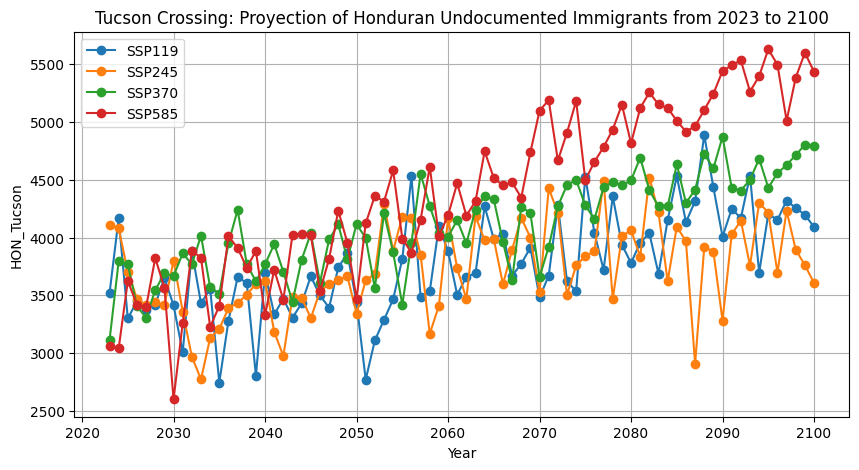

In [30]:
# Setting the index of all DataFrames to 'Year'
final_predictions_2023_2100_ssp119_HON.set_index('Year', inplace=True)
final_predictions_2023_2100_ssp245_HON.set_index('Year', inplace=True)
final_predictions_2023_2100_ssp370_HON.set_index('Year', inplace=True)
final_predictions_2023_2100_ssp585_HON.set_index('Year', inplace=True)
###########
# Plotting
plt.figure(figsize=(10, 5))  # You can adjust the figure size as needed
for ssp, label in zip([final_predictions_2023_2100_ssp119_HON, final_predictions_2023_2100_ssp245_HON, final_predictions_2023_2100_ssp370_HON, final_predictions_2023_2100_ssp585_HON], ['SSP119', 'SSP245', 'SSP370', 'SSP585']):
    plt.plot(ssp.index, ssp['HON_Tucson'], marker='o', linestyle='-', label=label)
###########
plt.title('Tucson Crossing: Proyection of Honduran Undocumented Immigrants from 2023 to 2100')
plt.xlabel('Year')
plt.ylabel('HON_Tucson')
plt.grid(True)
plt.legend()

plt.savefig("All_outputs/Honduras/Tucson_HON_All_Projections.png")

plt.show()

In [31]:
# Function to extract data for each scenario
def extract_data(final_predictions, scenario):
    return pd.DataFrame({
        'Scenario': [scenario] * len(final_predictions),
        'Year': final_predictions.index,
        'Number_of_People': final_predictions['HON_Tucson']
    })
# Extract data for each scenario
data_ssp119_HON = extract_data(final_predictions_2023_2100_ssp119_HON, 'SSP119')
data_ssp245_HON = extract_data(final_predictions_2023_2100_ssp245_HON, 'SSP245')
data_ssp370_HON = extract_data(final_predictions_2023_2100_ssp370_HON, 'SSP370')
data_ssp585_HON = extract_data(final_predictions_2023_2100_ssp585_HON, 'SSP585')
# Concatenating all scenarios into a single DataFrame
output_df_HON = pd.concat([data_ssp119_HON, data_ssp245_HON, data_ssp370_HON, data_ssp585_HON], ignore_index=True)
# Pivot the DataFrame
output_df_pivoted_HON = output_df_HON.pivot(index='Scenario', columns='Year', values='Number_of_People')
# Fill any missing values with 0
output_df_pivoted_HON.fillna(0, inplace=True)

# Reformatting dataframe
output_df_pivoted_HON.insert(0, 'Crossing', 'Tucson_Crossing')
output_df_pivoted_HON.insert(1, 'Country', 'HON')

# Saving dataframe

output_df_pivoted_HON.to_csv("All_outputs/Honduras/Tucson_HON_4SSP.csv", index=True)

# Printing
output_df_pivoted_HON

Year,Crossing,Country,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
Scenario,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SSP119,Tucson_Crossing,HON,3516.39,4165.66,3300.15,3448.49,3372.71,3421.10,3651.12,3414.22,3007.22,3882.74,3430.31,3558.91,2745.37,3281.09,3656.99,3609.04,2805.17,3697.19,3335.96,3470.20,3307.70,3430.63,3664.90,3499.66,3393.27,3741.65,3862.35,3439.39,2771.19,3110.49,3288.44,3466.66,3815.82,4529.41,3483.64,3535.08,4098.51,3881.50,3505.76,3660.88,3691.32,4269.45,3986.28,4033.17,3670.28,3773.33,3914.01,3481.86,3670.34,4280.67,3622.25,3535.34,4528.03,4039.06,3720.20,4356.37,3938.01,3780.32,3956.69,4037.33,3687.05,4149.82,4532.34,4133.33,4315.07,4886.53,4433.44,4007.10,4248.13,4168.51,4535.92,3696.15,4205.29,4153.18,4320.33,4254.99,4197.67,4090.79
SSP245,Tucson_Crossing,HON,4111.33,4079.06,3704.95,3470.58,3413.14,3442.98,3414.33,3800.94,3360.42,2969.99,2773.66,3132.29,3209.59,3390.22,3433.82,3506.02,3599.72,3623.23,3184.93,2974.85,3487.98,3480.49,3302.19,3535.03,3596.91,3633.55,3664.41,3341.89,3630.71,3684.35,4286.98,3887.97,4181.49,4167.76,3852.98,3166.88,3411.12,4167.39,3733.84,3468.94,4184.36,3976.06,3986.76,3596.31,3895.88,4170.00,4000.27,3526.06,4424.89,4216.81,3504.14,3759.05,3838.02,3881.80,4490.13,3469.57,4010.95,4064.04,3834.16,4519.23,4217.64,3622.52,4094.98,3967.61,2907.65,3916.97,3878.88,3281.00,4028.54,4146.44,3757.34,4301.55,4215.92,3696.64,4232.89,3894.25,3761.85,3606.47
SSP370,Tucson_Crossing,HON,3110.39,3793.35,3767.96,3404.64,3307.80,3545.77,3689.46,3667.33,3864.35,3769.13,4016.52,3569.61,3516.04,3951.50,4239.82,3771.02,3620.50,3767.63,3943.66,3703.82,3443.96,3808.31,4036.73,3611.16,3983.84,4113.96,3813.03,4115.50,3996.38,3561.06,4211.20,3872.86,3418.43,3953.74,4551.19,4273.96,4036.23,4007.60,4150.50,3951.56,4239.06,4358.75,4329.64,3962.83,3631.59,4268.72,4211.18,3658.70,3919.74,4270.52,4454.92,4498.92,4278.04,4160.49,4433.82,4480.07,4452.15,4494.46,4691.80,4409.53,4269.17,4269.05,4635.24,4299.35,4414.00,4722.80,4598.84,4872.92,4429.84,4406.48,4501.05,4681.11,4431.50,4556.29,4628.18,4713.62,4803.57,4790.14
SSP585,Tucson_Crossing,HON,3059.34,3040.85,3623.91,3419.36,3399.19,3822.79,3566.26,2601.75,3258.89,3887.17,3825.01,3227.16,3409.28,4010.57,3911.78,3737.92,3885.56,3330.53,3721.68,3462.48,4025.54,4034.82,4019.70,3536.93,3816.72,4232.86,3954.89,3468.94,4122.15,4361.16,4310.95,4580.84,3991.68,3868.26,4153.87,4611.36,4012.59,4192.14,4469.37,4190.27,4313.33,4746.80,4514.56,4452.37,4476.61,4346.19,4738.07,5097.49,5189.50,4666.92,4907.73,5181.07,4497.29,4655.75,4783.38,4934.72,5149.56,4815.31,5119.58,5255.06,5151.85,5121.41,5010.59,4916.42,4963.22,5103.84,5244.24,5441.13,5490.79,5533.00,5262.89,5396.36,5629.35,5495.63,5011.55,5384.00,5598.55,5434.04


# Final Plots

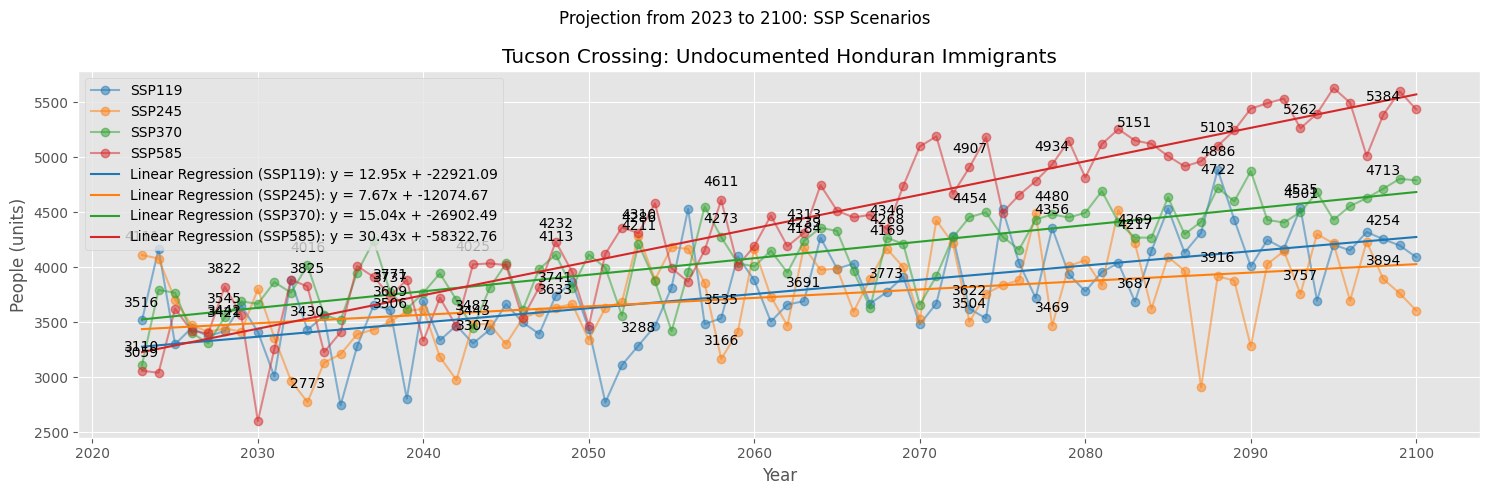

In [32]:
# Plotting results

##################################################################
# Using ggplot
plt.style.use('ggplot')
##################################################################
# Color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
##################################################################
# Plot size
plt.figure(figsize=(15, 5))  # You can adjust the figure size as needed
##################################################################
# Convert index values to strings
output_df_pivoted_HON.index = output_df_pivoted_HON.index.astype(str)
##################################################################
# Selecting every 5th year to display
years_to_display = output_df_pivoted_HON.columns[2:][::5]  # Excluding first two columns
##################################################################
# Plotting data for each scenario
for scenario, color in zip(output_df_pivoted_HON.index, colors):
    plt.plot(output_df_pivoted_HON.columns[2:].astype(int), output_df_pivoted_HON.loc[scenario][2:], marker='o', linestyle='-', alpha=0.5, label=scenario, color=color)
    for year in years_to_display:
        plt.annotate(f'{int(output_df_pivoted_HON.loc[scenario, year])}', (int(year), output_df_pivoted_HON.loc[scenario, year]), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Tucson Crossing: Undocumented Honduran Immigrants')
plt.suptitle('Projection from 2023 to 2100: SSP Scenarios')
plt.xlabel('Year')
plt.ylabel('People (units)')
##################################################################
# Linear Regression Equation
X = output_df_pivoted_HON.columns[2:].astype(int).values.reshape(-1, 1)
for scenario, color in zip(output_df_pivoted_HON.index, colors):
    y = output_df_pivoted_HON.loc[scenario][2:].values.reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    m = model.coef_[0][0]
    b = model.intercept_[0]
    plt.plot(output_df_pivoted_HON.columns[2:].astype(int), m * output_df_pivoted_HON.columns[2:].astype(int) + b, label=f'Linear Regression ({scenario}): y = {m:.2f}x + {b:.2f}', color=color)
plt.grid(True)
plt.legend()
plt.tight_layout()
##################################################################

# Saving graph
plt.savefig("All_outputs/Honduras/Tucson_HON_4SSP_Single.png")

plt.show()